ver: 20210916.1056

In [5]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Set a better print format for numpy values.
np.set_printoptions(formatter={'float': '{: 0.3f}'.format, 'int': '{: 5d}'.format})

# 1.1 离散时间信号———序列

## 1.1.2 序列的运算

### 1. 基于对幅度的运算

**(1) 加法**
$$ z(n) = x(n) + y(n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $y(n)=\{\underline{1}, 3, 2\}$, 求 $z(n)$

In [6]:
# Define the sequences.

x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
print("x =", x, ", noff_x =", noff_x)

y = np.array([1, 3, 2]); noff_y = 0
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [    1     3     2] , noff_y = 0


In [7]:
# Numpy's "+" operator is element-wise addition. It should be what we need, right?
# 不正确, 两个序列总的元素数量不一致
z = x + y
print("x =", x)
print("y =", y)
print("z =", z)

ValueError: operands could not be broadcast together with shapes (4,) (3,) 


当多个序列间进行运算操作时，需要注意操作对序列长度的要求。例如，加法等操作要求两个数组长度相同。如果数组长度不同，常用的方法就是补零。

In [ ]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Pad y with 0, so that it has the same length as x
y = np.concatenate((y, [0]))

z = x + y
print("x =", x)
print("y =", y)
print("z =", z)

# There is no error now, but does it mean the result is correct?
# 不正确, 两个序列的偏移点没有对齐
# Pay close attention to z's values!

x = [ 1.000  0.500  0.250  0.125]
y = [    1     3     2     0]
z = [ 2.000  3.500  2.250  0.125]


z = [ 2.000  3.500  2.250  0.125]


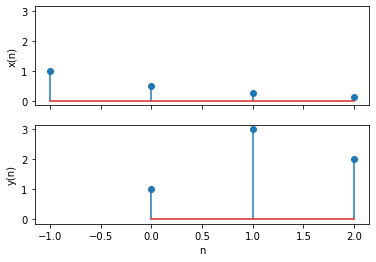

In [ ]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Let's plot x and y to see what happens.
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')
print("z =", z)

多序列运算，还特别需要注意所有数组相应于$n=0$的下标。一个常见的方法是运算前，先进行数组的对齐，即把各个数组前后补零，令到所有数组相应$n=0$的下标相同。

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [    0     1     3     2] , noff_y = 1
z = [ 1.000  1.500  3.250  2.125] , noff_z = 1


Text(0.5, 0, 'n')

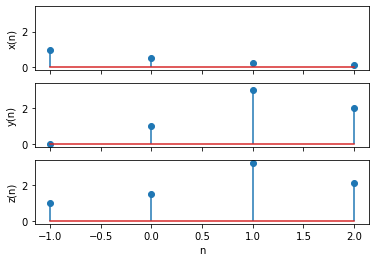

In [ ]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Align x and y
y = np.concatenate(([0], y))
noff_y = noff_y + 1    # Why do this? 因为在数组前面补零，所以y数组起始元素偏移应加上补零的数量

z = x + y
noff_z = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)
print("z =", z, ", noff_z =", noff_z)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[2].stem(seq_n(z, noff_z), z)
axs[2].set_ylabel('z(n)')
axs[2].set_xlabel('n')

**(2) 乘法**
$$ w(n)=x(n)y(n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $y(n)=\{1, 3, \underline{2}\}$, 求 $w(n)$

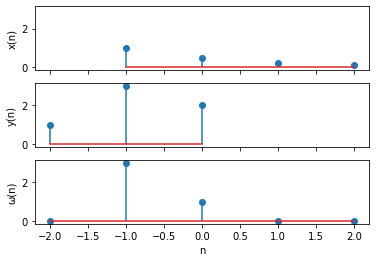

In [114]:
# 序列X
seqX = np.array([1, 1/2, 1/4, 1/8])
# 序列X的原点偏移
offsetX = 1
# 序列Y
seqY = np.array([1, 3, 2])
# 序列Y的原点偏移
offsetY = 2


def alignSequence(seq1, offset1, seq2, offset2):
    # 原点左边最多多少个元素
    maxLeft = max(offset1, offset2)
    # 原点右边元素个数
    eleAtRight1 = seq1.size - offset1 - 1
    eleAtRight2 = seq2.size - offset2 - 1
    # 原点右边最多多少个元素, -1 是因为不包括原点
    maxRight = max(eleAtRight1, eleAtRight2)
    # 在序列左边和右边补对应个数的0
    seq1 = np.pad(seq1, (maxLeft - offset1,  # 左边补0个数
                         maxRight - eleAtRight1),  # 右边补0个数
                  constant_values=(0, 0))  # 补的元素
    seq2 = np.pad(seq2, (maxLeft - offset2,  # 左边补0个数
                         maxRight - eleAtRight2),  # 右边补0个数
                  constant_values=(0, 0))  # 补的元素
    return seq1, maxLeft, seq2, maxLeft


def testAlignSequence():
    # Define test sequence
    seq1 = np.array([0, 1, 2, 3, 4, 5, 6])
    seq2 = np.array([0, 1, 2])

    def checkAlign(expected1, expected2, seq1, offset1, seq2, offset2):
        # Align the sequence
        seq1, offset, seq2, offset2 = alignSequence(
            seq1, offset1, seq2, offset2)
        # Check if offset is correct
        assert offset == max(
            offset1, offset2), f'Result offset:{offset} Input offset:{offset1}'
        # Check if sequence is correct
        assert (expected1 == seq1).all(
        ), f'Expected1:{expected1} Actual1:{seq1}'
        assert (expected2 == seq2).all(
        ), f'Expected2:{expected2} Actual2:{seq2}'

    checkAlign([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 0, 0, 0, 0], seq1, 0, seq2, 0)
    checkAlign([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 1, 2, 0, 0], seq1, 3, seq2, 1)
    checkAlign([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 1, 2], seq1, 6, seq2, 2)
    checkAlign([0, 1, 2, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6], seq2, 0, seq1, 0)
    checkAlign([0, 0, 0, 1, 2, 0, 0], [0, 1, 2, 3, 4, 5, 6], seq2, 1, seq1, 3)
    checkAlign([0, 0, 0, 0, 0, 1, 2], [0, 1, 2, 3, 4, 5, 6], seq2, 2, seq1, 6)


testAlignSequence()


def multiplySequence(seq1, offset1, seq2, offset2):
    seq1, offset1, seq2, offset2 = alignSequence(seq1, offset1, seq2, offset2)
    # return multiplied result and its offset
    return seq1 * seq2, offset1


def testMultiplySequence():
    # Define test sequence
    seq1 = np.array([0, 1, 2, 3, 4, 5, 6])
    seq2 = np.array([0, 1, 2])

    def checkMultiply(expected, seq1, offset1, seq2, offset2):
        # Calculate the multiply result
        seq, offset = multiplySequence(seq1, offset1, seq2, offset2)
        # Check if offset is correct
        assert offset == offset1, f'Result offset:{offset} Input offset:{offset1}'
        # Check if sequence is correct
        assert (expected == seq).all(), f'Expected:{expected} Actual:{seq}'

    checkMultiply([0, 1, 4, 0, 0, 0, 0], seq1, 0, seq2, 0)
    checkMultiply([0, 0, 0, 3, 8, 0, 0], seq1, 3, seq2, 1)
    checkMultiply([0, 0, 0, 0, 0, 5, 12], seq1, 6, seq2, 2)


testMultiplySequence()


def plotVertical(seqs, offsets, labels):
    # Get the row number
    row = len(seqs)
    # Create a plot, which has specific row and 1 col, shares the same X and Y axis
    figure, axe = plt.subplots(row, 1, sharex=True, sharey=True)
    for i in range(row):
        # Get the arguments
        seq = seqs[i]
        offset = offsets[i]
        label = labels[i]
        # Create a stem plot for seq
        axe[i].stem(seq_n(seq, offset), seq)
        # Set Y label
        axe[i].set_ylabel(label)

    # Set X label at the bottom
    axe[row - 1].set_xlabel('n')


# Calculate the Omega sequence and its offset
seqOmega, offsetOmega = multiplySequence(seqX, offsetX, seqY, offsetY)
# then plot it out
plotVertical([seqX, seqY, seqOmega],
             [offsetX, offsetY, offsetOmega],
             ["x(n)", "y(n)", "ω(n)"])


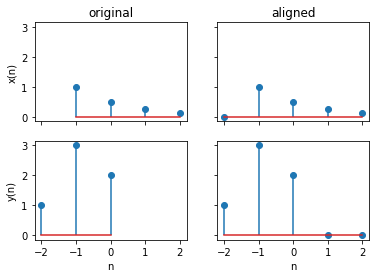

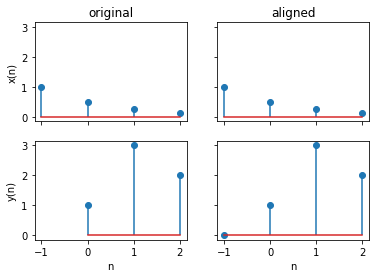

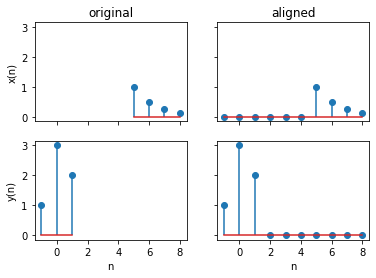

In [ ]:
# [BEST PRACTICE] Build a general function for a commonly used operation.

def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)     # 原点左边最多多少个元素
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)   # 原点右边最多多少个元素
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)),# (序列前面补元素的数目，序列后边补元素数目)
                  constant_values=(0, 0))   # (序列前面补的元素，序列后边补的元素)
    noff1 = -n_min  # 新序列原点的偏移
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)),  # (序列前面补元素的数目，序列后边补元素数目)
                  constant_values=(0, 0))   # (序列前面补的元素，序列后边补的元素)
    noff2 = -n_min  # 新序列原点的偏移
    return (seq1, noff1, seq2, noff2)

# [BEST PRACTICE] Unit test for a complex function.
# This is not a standard unit test.
# It does not verify the result automatically, but let users to observe the plots.
# Note that this is good for education but not for engineering.


def test_seq_align():
    """Unit test for seq_align()"""
    def show_aligned_seqs(x, noff_x, y, noff_y):
        fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
        axs[0, 0].set_title('original')
        axs[0, 0].stem(seq_n(x, noff_x), x)
        axs[0, 0].set_ylabel('x(n)')
        axs[1, 0].stem(seq_n(y, noff_y), y)
        axs[1, 0].set_ylabel('y(n)')
        axs[1, 0].set_xlabel('n')

        (x, noff_x, y, noff_y) = seq_align(x, noff_x, y, noff_y)

        axs[0, 1].set_title('aligned')
        axs[0, 1].stem(seq_n(x, noff_x), x)
        axs[1, 1].stem(seq_n(y, noff_y), y)
        axs[1, 1].set_xlabel('n')

    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 2)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 0)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), -5, np.array([1, 3, 2]), 1)


# Run the unit test.
test_seq_align()


**(3) 累加**
$$ y(n) = \sum_{k=-\infty}^{n}x(k) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)$

In [ ]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

# Why we need '+1' at the end? sum(x[0:k]) 意思是将从0开始(包括0)的k个数相加，k的取值从1到x.size, 而np.arange生成的序列取值范围是[0,x.size),所以要给每个元素都+1
# Why use np.arange() instead of range()? np.arange生成的是np.array, 而range生成的是普通的array,不能使用+1语法给每个元素都+1
y = np.array([sum(x[0:k]) for k in np.arange(x.size)+1])
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  1.500  1.750  1.875] , noff_y = 1


In [24]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

# [BEST PRACTICE] Use built-in method whenever possible.
y = x.cumsum()
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  1.500  1.750  1.875] , noff_y = 1


**(4) 序列的绝对和**
$$ S = \sum_{n=-\infty}^{\infty} |x(n)| $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $S$

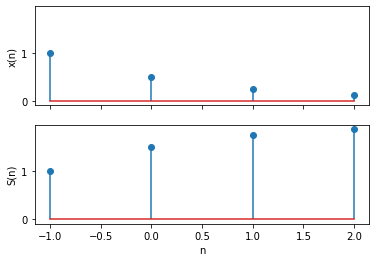

In [115]:
x = np.array([1, 1/2, 1/4, 1/8])
noff_x = 1


def absoluteSum(seq):
    # Return sequence absolute sum
    return np.abs(seq).cumsum()


def testAbsoluteSum():
    # Define test sequence
    seq = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    # Check if result correct
    assert ([5, 9, 12, 14, 15, 15, 16, 18, 21, 25, 30]
            == absoluteSum(seq)).all()


testAbsoluteSum()

# Calculate the value of S
S = absoluteSum(x)
# Apply the offset of S
offsetS = noff_x
# Plot S
plotVertical([x, S],
             [noff_x, offsetS],
             ["x(n)", "S(n)"])


**(5) 序列的能量**
$$ E[x(n)] = \sum_{n=-\infty}^{\infty} |x(n)|^{2} $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $E[x(n)]$

In [68]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

seq_energy = lambda x: np.sum(np.power(np.abs(x),2))

E = seq_energy(x)

print("x =", x, ", noff_x =", noff_x)
print("E = ", E)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
E =  1.328125


**(6) 序列的平均功率**
$$ P[x(n)] = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x(n)|^2 $$
对于周期信号，只需取一个周期 $N$ 的平均功率。

对于有限长信号，只计算有效长度 $N$ 之内平均功率。
$$ P[x(n)] = \frac{1}{N} \sum_{n=0}^{N-1} |x(n)|^2 $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $P[x(n)]$

In [71]:
def averagePower(seq):
    return seq_energy(seq) / seq.size


def testAveragePower():
    # Define test sequence
    seq = np.array([0, 1, 2, 3, 4, 5])
    # Check if result is correct
    assert averagePower(seq) - 9.1666 < 0.0001


testAveragePower()

# Define x sequence
x = np.array([1, 1/2, 1/4, 1/8])
# Offset of x sequence
offsetX = 1

P_avg = averagePower(x)
print(f'Average Power:{P_avg}')


Average Power:0.33203125


### 2. 基于对变量的运算

(1) 移位
$$ y(n)=x(n-m) $$

设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(n+2)$

m = -2
x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  0.500  0.250  0.125] , noff_y = 3


Text(0.5, 0, 'n')

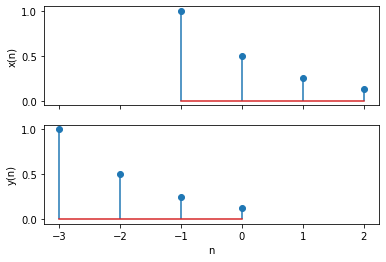

In [78]:
x = np.array([1, 1/2, 1/4, 1/8])
noff_x = 1

m = -2  # Why not m=2? 因为y(n)定义是x(n-m),但题目里是x(n+2), 计算得 m = -2

# Build a general function.


def seq_shift(seq, noff, m): return (seq, noff - m)   # Why noff-m? 因为y(n)定义是x(n-m)


(y, noff_y) = seq_shift(x, noff_x, m)

print("m =", m)
print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')


(2) 翻褶
$$ y(n)=x(-n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(-n)$

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 0.125  0.250  0.500  1.000] , noff_y = 2


Text(0.5, 0, 'n')

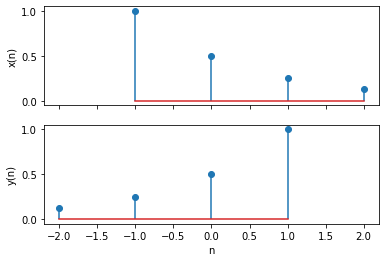

In [81]:
x = np.array([1, 1/2, 1/4, 1/8])
noff_x = 1

y = x[::-1]
noff_y = x.size - noff_x - 1

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')


设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(2-n)$

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 0.125  0.250  0.500  1.000] , noff_y = 0


Text(0.5, 0, 'n')

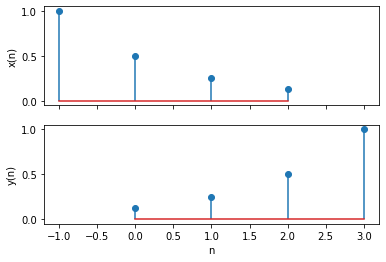

In [98]:
x = np.array([1, 1/2, 1/4, 1/8])
noff_x = 1

m = -2

y = x[::-1]
# Why +m, not -m? 因为此函数定义式应为y(n)=x(-n-m), 即y(n)=x(-(n+m)), 所以是+m
noff_y = (x.size - noff_x - 1) + m

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')


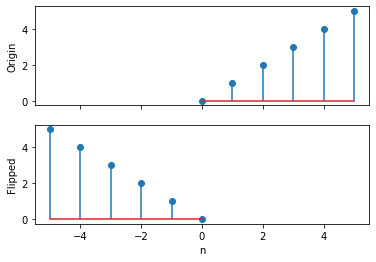

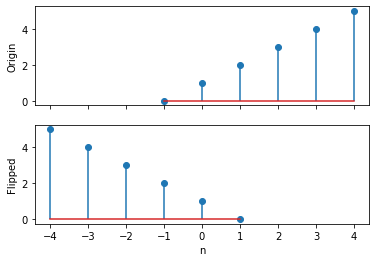

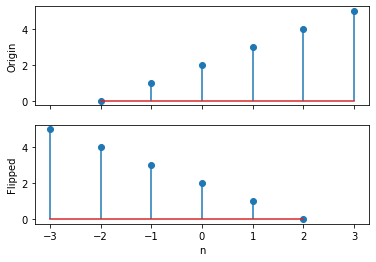

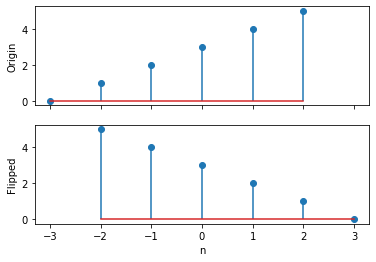

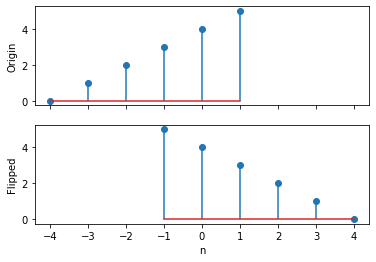

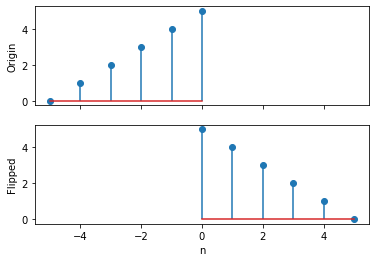

In [116]:
# Build a general function for flipping a sequence.

# The API of the function:
#
# seq_flip(seq, noff)
#    Returns a flipped sequence.
#
#    Parameters:
#        seq: array_like
#             Input sequence.
#        noff: int
#             n's offset, i.e. the index of seq where n=0.
#    Returns: (seq, noff)
#        seq: array_like
#             Output sequence.
#        noff: int
#             n's offset.

# [To be completed by students.]
# Note:
# - Requires the function and its unit test.
# - Follow the previous unit test example, test_seq_align().

def seq_flip(seq, noff):
    # Return the flipped sequence and its noff
    return seq[::-1], seq.size - noff - 1


def testSeq_flip():
    def checkSeq_flip(expected, seq, noff):
        # Convert the seq to np.array
        seq = np.array(seq)
        # Get the flipped sequence and its noff
        seq2, noff2 = seq_flip(seq, noff)
        # Plot the sequence
        plotVertical([seq, seq2], [noff,  noff2], ['Origin', 'Flipped'])
        # Check if result valid
        assert (seq[::-1] == seq2).all(), f'Expected:{seq[::-1]} Actual:{seq2}'
        assert expected == noff2, f'Expected:{expected} Actual:{noff2}'

    # Test items
    checkSeq_flip(5, [0, 1, 2, 3, 4, 5], 0)
    checkSeq_flip(4, [0, 1, 2, 3, 4, 5], 1)
    checkSeq_flip(3, [0, 1, 2, 3, 4, 5], 2)
    checkSeq_flip(2, [0, 1, 2, 3, 4, 5], 3)
    checkSeq_flip(1, [0, 1, 2, 3, 4, 5], 4)
    checkSeq_flip(0, [0, 1, 2, 3, 4, 5], 5)


# Run test seq_flip
testSeq_flip()


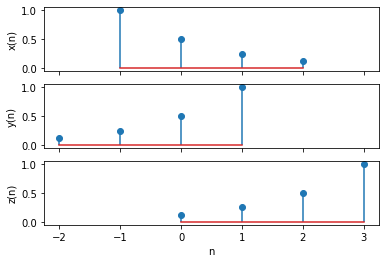

In [118]:
# Repeat the above computation y(n)=x(2-n), but this time use seq_flip() and seq_shift() instead.

# [To be completed by students.]
seqX = np.array([1, 1/2, 1/4, 1/8])
offsetX = 1

# Flip the sequence first
seqY, offsetY = seq_flip(seqX, offsetX)
# the shift it
seqZ, offsetZ = seq_shift(seqY, offsetY, 2)

# Plot it
plotVertical(
    [seqX, seqY, seqZ],
    [offsetX, offsetY, offsetZ],
    ["x(n)", "y(n)", "z(n)"]
)
